In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


from sklearn import preprocessing
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
import os
from pandas_summary import DataFrameSummary
from matplotlib import pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import re

import shap
import eli5
from eli5.sklearn import PermutationImportance
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, TimeSeriesSplit, train_test_split


from sklearn.metrics import roc_auc_score
import time

In [3]:
train = pd.read_csv("Modeltrain.csv")
test = pd.read_csv("Modeltest.csv")

Columns (11,14) have mixed types.Specify dtype option on import or set low_memory=False.
Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.


<img src="feature importance.png">

In [29]:
train["card1_median_amt"] = train["card1"].map(train.groupby(["card1"])["TransactionAmt"].median())
test["card1_median_amt"] = test["card1"].map(test.groupby(["card1"])["TransactionAmt"].median())

train["card2_median_amt"] = train["card2"].map(train.groupby(["card2"])["TransactionAmt"].median())
test["card2_median_amt"] = test["card2"].map(test.groupby(["card2"])["TransactionAmt"].median())

train["card3_median_amt"] = train["card3"].map(train.groupby(["card3"])["TransactionAmt"].median())
test["card3_median_amt"] = test["card3"].map(test.groupby(["card3"])["TransactionAmt"].median())

train["card4_median_amt"] = train["card4"].map(train.groupby(["card4"])["TransactionAmt"].median())
test["card4_median_amt"] = test["card4"].map(test.groupby(["card4"])["TransactionAmt"].median())

train["card5_median_amt"] = train["card5"].map(train.groupby(["card5"])["TransactionAmt"].median())
test["card5_median_amt"] = test["card5"].map(test.groupby(["card5"])["TransactionAmt"].median())


train["card6_median_amt"] = train["card6"].map(train.groupby(["card6"])["TransactionAmt"].median())
test["card6_median_amt"] = test["card6"].map(test.groupby(["card6"])["TransactionAmt"].median())

In [30]:
train["card1_addr1"] = train[["card1","addr1"]].apply(lambda x: str(x["card1"]) + "_" + str(x["addr1"]),axis=1)
test["card1_addr1"] = test[["card1","addr1"]].apply(lambda x: str(x["card1"]) + "_" + str(x["addr1"]),axis=1)


train["card2_addr1"] = train[["card2","addr1"]].apply(lambda x: str(x["card2"]) + "_" + str(x["addr1"]),axis=1)
test["card2_addr1"] = test[["card2","addr1"]].apply(lambda x: str(x["card2"]) + "_" + str(x["addr1"]),axis=1)

train["card3_addr1"] = train[["card3","addr1"]].apply(lambda x: str(x["card3"]) + "_" + str(x["addr1"]),axis=1)
test["card3_addr1"] = test[["card3","addr1"]].apply(lambda x: str(x["card3"]) + "_" + str(x["addr1"]),axis=1)



train["card4_addr1"] = train[["card4","addr1"]].apply(lambda x: str(x["card4"]) + "_" + str(x["addr1"]),axis=1)
test["card4_addr1"] = test[["card4","addr1"]].apply(lambda x: str(x["card4"]) + "_" + str(x["addr1"]),axis=1)


train["card5_addr1"] = train[["card5","addr1"]].apply(lambda x: str(x["card5"]) + "_" + str(x["addr1"]),axis=1)
test["card5_addr1"] = test[["card5","addr1"]].apply(lambda x: str(x["card5"]) + "_" + str(x["addr1"]),axis=1)


train["card6_addr1"] = train[["card6","addr1"]].apply(lambda x: str(x["card6"]) + "_" + str(x["addr1"]),axis=1)
test["card6_addr1"] = test[["card6","addr1"]].apply(lambda x: str(x["card6"]) + "_" + str(x["addr1"]),axis=1)

In [40]:
train["D15_median_amt"] = train["D15"].map(train.groupby(["D15"])["TransactionAmt"].median())
test["D15_median_amt"] = test["D15"].map(test.groupby(["D15"])["TransactionAmt"].median())

In [41]:
train["C13_median_amt"] = train["C13"].map(train.groupby(["C13"])["TransactionAmt"].median())
test["C13_median_amt"] = test["C13"].map(test.groupby(["C13"])["TransactionAmt"].median())

In [43]:
train["C13_D15"] = train.apply(lambda x: str(x["C13"]) + "_" + str(x["D15"]),axis=1)
test["C13_D15"] = test.apply(lambda x: str(x["C13"]) + "_" + str(x["D15"]),axis=1)

In [49]:
train["id_01_median_amt"] = train["id_01"].map(train.groupby(["id_01"])["TransactionAmt"].median())
test["id_01_median_amt"] = test["id_01"].map(test.groupby(["id_01"])["TransactionAmt"].median())

In [53]:
y = train["isFraud"]
train = train.drop(["isFraud"],axis=1)

In [54]:
for f in tqdm(train.columns):
    if train[f].dtype=='object' or test[f].dtype=='object':
        train[f] = train[f].fillna('unseen_before_label')
        test[f] = test[f].fillna('unseen_before_label')
        lbl = LabelEncoder()
        lbl.fit(list(train[f].values) + list(test[f].values))
        train[f] = lbl.transform(list(train[f].values))
        test[f] = lbl.transform(list(test[f].values))
   

100%|████████████████████████████████████████████████████████████████████████████████| 459/459 [01:04<00:00,  7.12it/s]


In [ ]:
train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test = test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))


In [75]:

from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,precision_recall_curve,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import time
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix

In [76]:
X=pd.concat([train,y],axis=1)
not_fraud=X[X.isFraud==0]
fraud=X[X.isFraud==1]

In [77]:
# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27)
upsampled = pd.concat([not_fraud, fraud_upsampled])

In [78]:
X_train, X_val, Y_train, Y_val = train_test_split(train,y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [79]:
import lightgbm
from lightgbm import LGBMClassifier
LGBMmodel = LGBMClassifier()
LGBMmodel.fit(X_train,Y_train)

LGBMClassifier()

In [81]:
print("Validation roc_auc_score",roc_auc_score(Y_val,LGBMmodel.predict_proba(X_val)[:,1] ))

Validation roc_auc_score 0.9320402029306114


In [82]:
sun = pd.read_csv("Subxg.csv")
sun["isFraud"] = LGBMmodel.predict_proba(test)[:,1]
sun.to_csv("try.csv",index=False)

In [84]:
clf = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=9,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    missing=-999,
    random_state=2019,
    tree_method='gpu_hist'  # THE MAGICAL PARAMETER
)

In [85]:
%time clf.fit(X_train, Y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[03:51:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 4min 48s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, gamma=0, gpu_id=0, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=9, min_child_weight=1, missing=-999,
              monotone_constraints='()', n_estimators=500, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=2019,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [86]:
print("Validation roc_auc_score",roc_auc_score(Y_val,clf.predict_proba(X_val)[:,1] ))

Validation roc_auc_score 0.9637035048638788


In [ ]:

sun["isFraud"] = clf.predict_proba(test)[:,1]
sun.to_csv("XGB_fe.csv",index=False)

<AxesSubplot:>

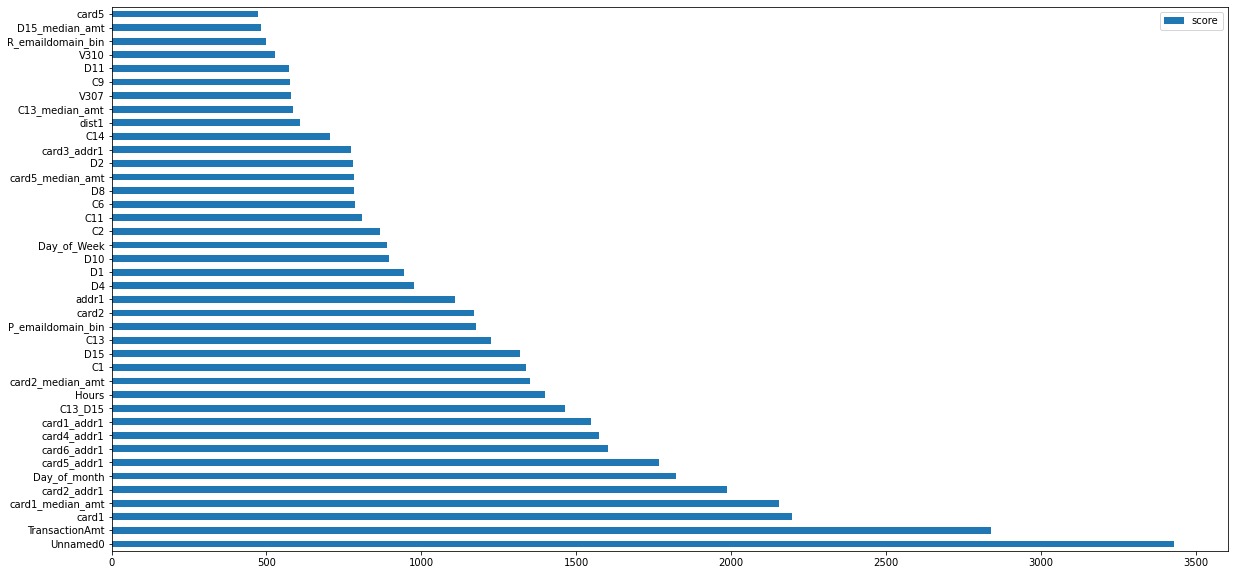

In [88]:
feature_important = clf.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

### Public AUC-ROC score increased to 0.924443